In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data
The dataset called "HR Analytics: Job Change of Data Scientists" is taken from https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists and it describing people who successfully pass some courses which conduct by a company. The company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates.

Features:

1. enrollee_id : Unique ID for candidate
2. city: City code
3. city_ development _index : Developement index of the city (scaled)
4. gender: Gender of candidate
5. relevent_experience: Relevant experience of candidate
6. enrolled_university: Type of University course enrolled if any
7. education_level: Education level of candidate
8. major_discipline :Education major discipline of candidate
9. experience: Candidate total experience in years
10. company_size: No of employees in current employer's company
11. company_type : Type of current employer
12. lastnewjob: Difference in years between previous job and current job
13. training_hours: training hours completed
14. target: 0 – Not looking for job change, 1 – Looking for a job change


In [5]:
df = pd.read_csv(r"/Users/kczk/Desktop/studyjin/9. semester/analysis of unstructured data/archive/aug_train.csv")
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


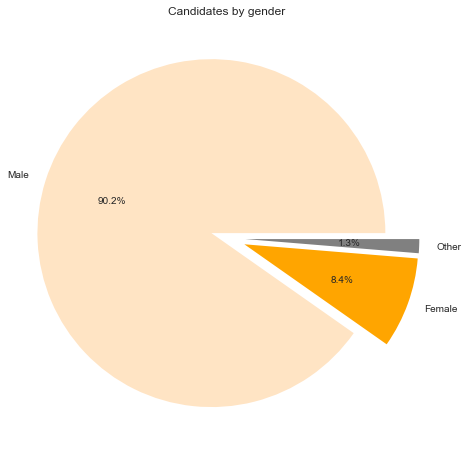

In [55]:
gender_series = df.gender.value_counts()
gender_series_p = round((gender_series / sum(gender_series)) * 100, 2)
explode = (0.1, 0.1, 0.1)
plt.figure(figsize=(8,8))
plt.style.use('seaborn')
plt.pie(gender_series_p, explode=explode, labels=['Male', 'Female', 'Other'], autopct='%1.1f%%',
        colors=('bisque', 'orange', 'grey'))
plt.title("Candidates by gender ")
fig.tight_layout()

This plot presents percentage share of male, female and other among candidates. We can see that most of them are men. Considering this data we can assume that data analysis sector is dominated by male gender. 

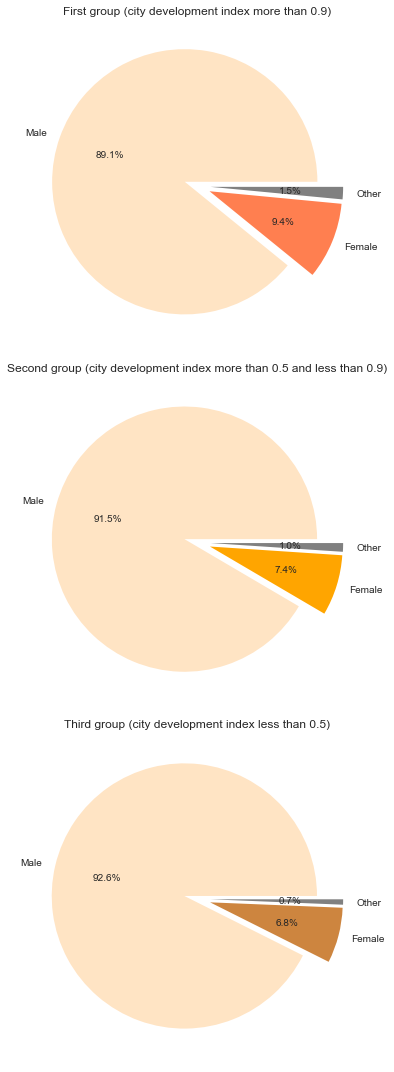

In [63]:
df_first_car = df[df['city_development_index']>0.9]
df_second_car = df[(df['city_development_index']<=0.9) & (df['city_development_index']>0.5)]
df_third_car = df[df['city_development_index']<0.6]

gender_series1 = df_first_car.gender.value_counts()
gender_series1_p = round((gender_series1 / sum(gender_series1)) * 100, 2)

gender_series2 = df_second_car.gender.value_counts()
gender_series2_p = round((gender_series2 / sum(gender_series2)) * 100, 2)

gender_series3 = df_third_car.gender.value_counts()
gender_series3_p = round((gender_series3 / sum(gender_series3)) * 100, 2)

plt.style.use('seaborn')
fig, axs = plt.subplots(3, figsize=(15,15))
axs[0].pie(gender_series1_p, explode=explode, labels=['Male', 'Female', 'Other'], autopct='%1.1f%%',
        colors=('bisque', 'coral', 'grey'))
axs[0].set_title("First group (city development index more than 0.9)")
axs[1].pie(gender_series2_p, explode=explode, labels=['Male', 'Female', 'Other'], autopct='%1.1f%%',
        colors=('bisque', 'orange', 'grey'))
axs[1].set_title("Second group (city development index more than 0.5 and less than 0.9)")
axs[2].pie(gender_series3_p, explode=explode, labels=['Male', 'Female', 'Other'], autopct='%1.1f%%',
        colors=('bisque', 'peru', 'grey'))
axs[2].set_title("Third group (city development index less than 0.5)")
fig.tight_layout()

By dividing the 'city development index' columns into three groups (more than 0.9, more than 0.5 and less than 0.9 and less than 0.5), we can see that inside 'more developed cities' class the share of female gender is bigger than in the second and third group. 

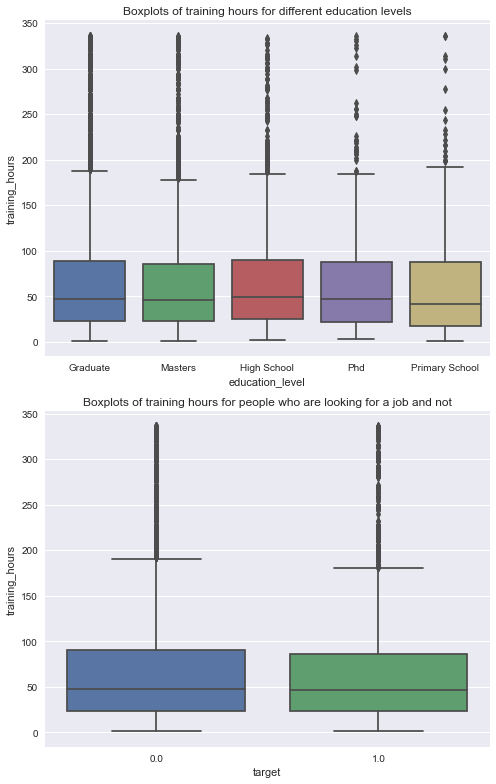

In [65]:
fig, axs = plt.subplots(2, figsize=(7,11))
sns.boxplot(y = df['training_hours'], x = df['education_level'], ax=axs[0]).set_title('Boxplots of training hours for different education levels')
sns.boxplot(y = df['training_hours'], x = df['target'], ax=axs[1]).set_title('Boxplots of training hours for people who are looking for a job and not')
fig.tight_layout()

Surprisingly, the education level and interest in finding a new job, has no effect on training hours.

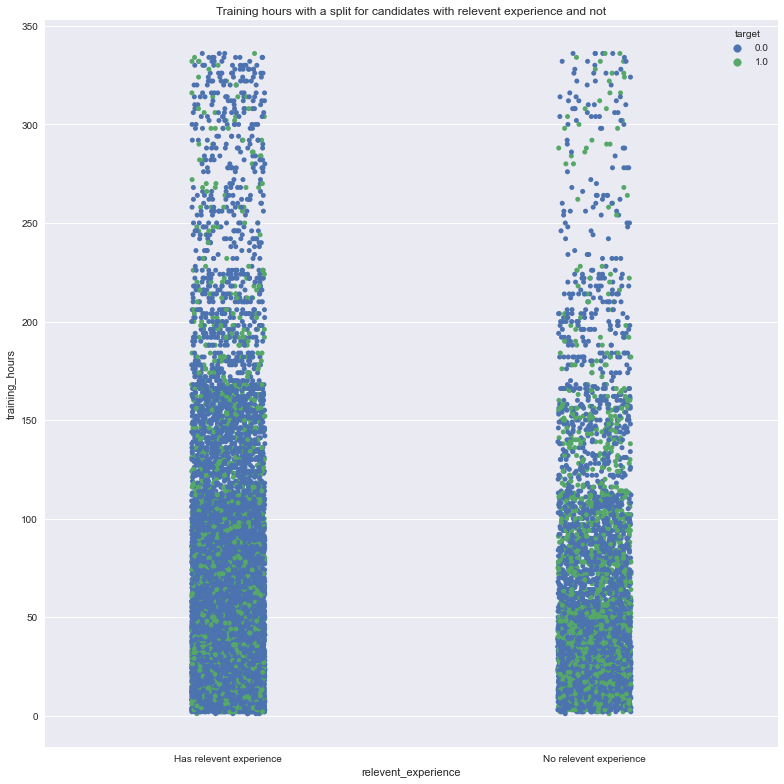

In [66]:
fig, axs = plt.subplots(1, figsize=(11,11))
sns.stripplot(y = df['training_hours'], x = df['relevent_experience'], hue=df['target']).set_title('Training hours with a split for candidates with relevent experience and not')
fig.tight_layout()

There are more candidates who have relevent experience and they took more hours than candidates without experiance. In group of people without experience, there are more people who are looking for a new job.

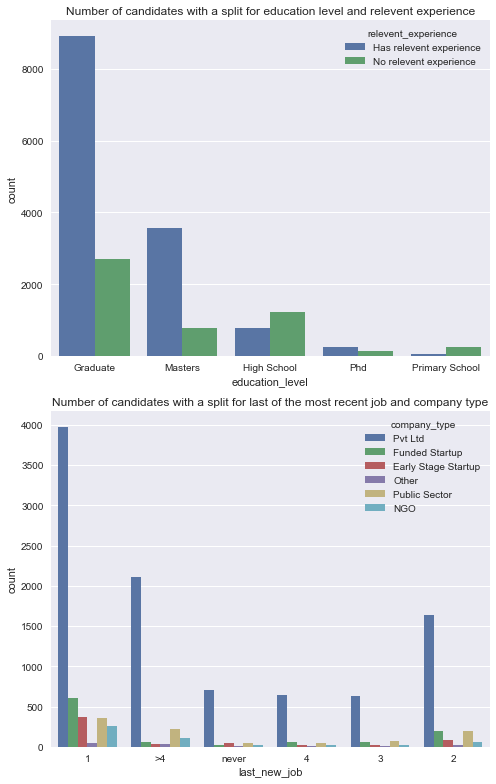

In [75]:
fig, axs = plt.subplots(2, figsize=(7,11))
sns.countplot(x=df['education_level'], hue=df['relevent_experience'], ax=axs[0]).set_title('Number of candidates with a split for education level and relevent experience')
sns.countplot(x=df['last_new_job'], hue=df['company_type'], ax=axs[1]).set_title('Number of candidates with a split for last of the most recent job and company type')
fig.tight_layout()

The biggest group of candidates are people ater graduate and most of them have previous experience. 
Candidates are mainly working for private companies. 

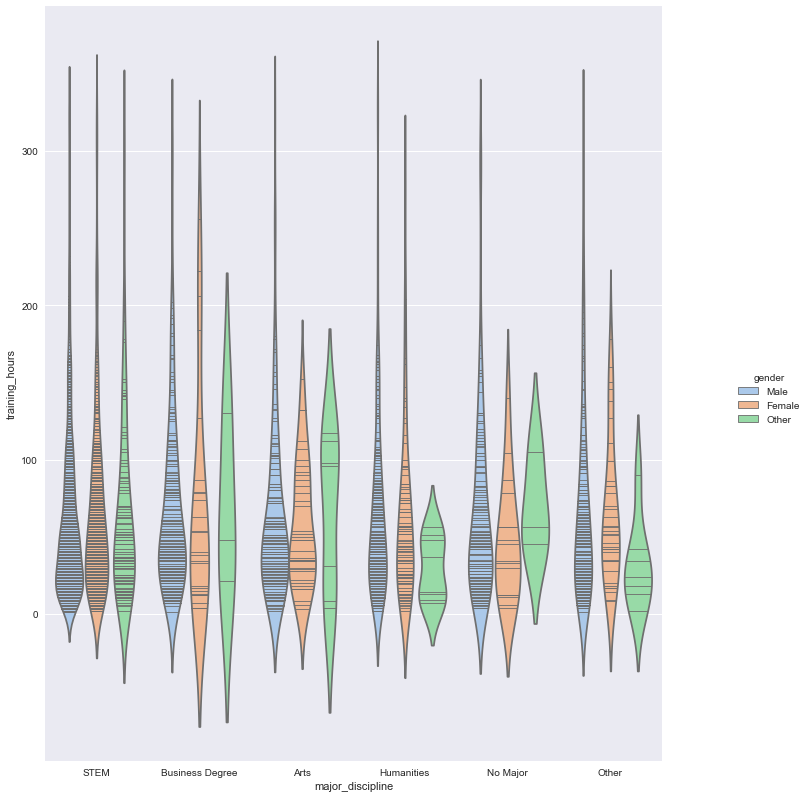

In [73]:
g = sns.catplot(x='major_discipline', y='training_hours', hue='gender',
            kind="violin", inner="stick",
            palette="pastel", data=df)
g.fig.set_figwidth(11.7)
g.fig.set_figheight(11.7)

This graph presents the distribution of candidates from different major discipline considering training hours and gender.

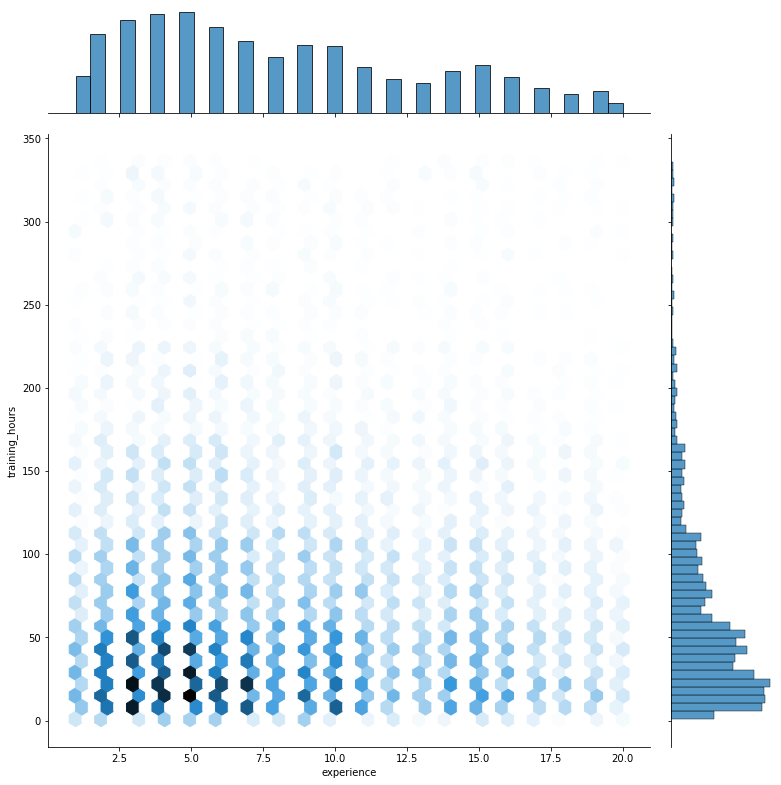

In [50]:
df['experience'] = df['experience'].replace(['>20', 20, '<1', 1])
df['x'] = pd.to_numeric(df['experience'][1:], errors='coerce')
g = sns.jointplot(x = pd.to_numeric(df['experience'][1:], errors='coerce'), y = df['training_hours'], kind = 'hex')
g.fig.set_figwidth(11.7)
g.fig.set_figheight(11.7)

Mostly people take between 0 and 100 hours of training and their experience is around 2 and 10 years.